In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from Class.Helper import Helper as Helper
helper = Helper()
import pickle

In [35]:
ki67_stats = pickle.load(open("../Test - Ki67/Ki67 Statistics.p", "rb"))
display(ki67_stats)

,Image,Resolution,Pixels,Blue Pixels,Blue Recall,Blue Time,Brown Pixels,Brown Recall,Brown Time,Avg. Recall,Total Time
0,1628-05,3744x3776,14137344,807,0.650558,2963.082348,195,0.866667,2922.8038,0.758612,5885.886148


In [36]:
import skimage as sk

In [37]:
sk.__version__

'0.15.0'

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,...,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
7,Gauss Functions Style,Data Banknote Authentication,Gaussian Equal,3,Center,Test,Value S-Functions,0.740291,0.631034,1.000000,...,0.773784,0.695157,183,229,0.5,5,---,4.103997,2019-05-25 11:31:33.769855,0.734471
15,Gauss Functions Style,Data Banknote Authentication,Gaussian Equal,5,Center,Test,Value S-Functions,0.856796,0.756198,1.000000,...,0.861176,0.852130,183,229,0.5,5,---,5.623257,2019-05-25 12:01:14.399801,0.856653
23,Gauss Functions Style,Data Banknote Authentication,Gaussian Equal,7,Center,Test,Value S-Functions,0.956311,0.994012,0.930612,...,0.948571,0.962025,183,229,0.5,5,---,10.981123,2019-05-25 12:42:36.192018,0.955298
31,Gauss Functions Style,Data Banknote Authentication,Gaussian Equal,9,Center,Test,Value S-Functions,0.980583,0.988827,0.974249,...,0.977901,0.982684,183,229,0.5,5,---,6.192816,2019-05-25 13:35:33.917874,0.980292
39,Gauss Functions Style,Data Banknote Authentication,Gaussian Equal,11,Center,Test,Value S-Functions,0.990291,0.983784,0.995595,...,0.989130,0.991228,183,229,0.5,5,---,17.067279,2019-05-25 14:48:28.898519,0.990179
7,Gauss Functions Style,Haberman,Gaussian Equal,3,Center,Test,Value S-Functions,0.260870,0.260870,0.000000,...,0.413793,0.000000,24,68,0.5,5,---,1.347997,2019-05-25 11:30:09.057896,0.206897
15,Gauss Functions Style,Haberman,Gaussian Equal,5,Center,Test,Value S-Functions,0.282609,0.237500,0.583333,...,0.365385,0.175000,24,68,0.5,5,---,1.191137,2019-05-25 11:53:28.863478,0.270192
23,Gauss Functions Style,Haberman,Gaussian Equal,7,Center,Test,Value S-Functions,0.750000,0.571429,0.764706,...,0.258065,0.849673,24,68,0.5,5,---,2.057001,2019-05-25 12:21:16.566747,0.553869
31,Gauss Functions Style,Haberman,Gaussian Equal,9,Center,Test,Value S-Functions,0.750000,0.529412,0.800000,...,0.439024,0.839161,24,68,0.5,5,---,1.811999,2019-05-25 12:34:39.368716,0.639093
39,Gauss Functions Style,Haberman,Gaussian Equal,11,Center,Test,Value S-Functions,0.695652,0.409091,0.785714,...,0.391304,0.797101,24,68,0.5,5,---,2.758537,2019-05-25 12:53:54.504560,0.594203


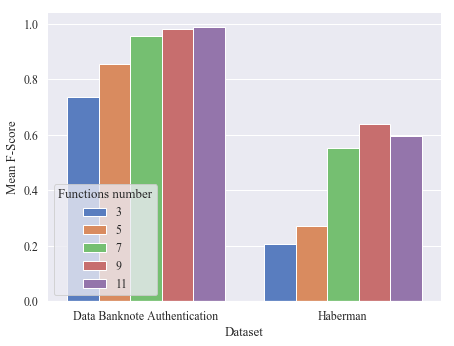

In [18]:
dataset_stats_banknote = helper.loadDatasetResults("Data Banknote Authentication", "Test", -1, False).sort_values(by=["Gausses"])
haberman = helper.loadDatasetResults("Haberman", "Test", -1, False).sort_values(by=["Gausses"])
dataset_stats_banknote = dataset_stats_banknote.loc[(dataset_stats_banknote.Style == "Gaussian Equal") & (dataset_stats_banknote.Adjustment == "Center")]
haberman = haberman.loc[(haberman.Style == "Gaussian Equal") & (haberman.Adjustment == "Center")]

df = pd.concat([dataset_stats_banknote, haberman])
display(df)

# sns.set(font="Garamond")
# sns.set(style="darkgrid")
sns.set(style="darkgrid", font="Times New Roman", font_scale=1.08)
g = sns.catplot(x="Dataset", y="Mean F-Score", hue="Gausses", data=df, kind="bar", palette="muted", legend=False, height=5, aspect=1.3)
g.despine(left=True)
plt.legend(loc='lower left',  title="Functions number")
g.set_ylabels("Mean F-Score")
g.savefig("data_analysis_gauss" + ".png")

In [26]:
df_banknote_print = dataset_stats_banknote[["Dataset", "Gausses", "Accuracy", "F-Score A", "F-Score B", "Mean F-Score"]].reset_index(drop=True)
display(df_banknote_print)

print(df_banknote_print.to_latex(float_format=lambda x: '%10.3f' % x, index=False))

,Dataset,Gausses,Accuracy,F-Score A,F-Score B,Mean F-Score
0,Data Banknote Authentication,3,0.740291,0.773784,0.695157,0.734471
1,Data Banknote Authentication,5,0.856796,0.861176,0.852130,0.856653
2,Data Banknote Authentication,7,0.956311,0.948571,0.962025,0.955298
3,Data Banknote Authentication,9,0.980583,0.977901,0.982684,0.980292
4,Data Banknote Authentication,11,0.990291,0.989130,0.991228,0.990179


\begin{tabular}{lrrrrr}
\toprule
                      Dataset &  Gausses &   Accuracy &  F-Score A &  F-Score B &  Mean F-Score \\
\midrule
 Data Banknote Authentication &        3 &      0.740 &      0.774 &      0.695 &         0.734 \\
 Data Banknote Authentication &        5 &      0.857 &      0.861 &      0.852 &         0.857 \\
 Data Banknote Authentication &        7 &      0.956 &      0.949 &      0.962 &         0.955 \\
 Data Banknote Authentication &        9 &      0.981 &      0.978 &      0.983 &         0.980 \\
 Data Banknote Authentication &       11 &      0.990 &      0.989 &      0.991 &         0.990 \\
\bottomrule
\end{tabular}



In [28]:
haberman_print = haberman[["Dataset", "Gausses", "Accuracy", "F-Score A", "F-Score B", "Mean F-Score"]].reset_index(drop=True)
display(haberman_print)

print(haberman_print.to_latex(float_format=lambda x: '%10.3f' % x, index=False))

,Dataset,Gausses,Accuracy,F-Score A,F-Score B,Mean F-Score
0,Haberman,3,0.260870,0.413793,0.000000,0.206897
1,Haberman,5,0.282609,0.365385,0.175000,0.270192
2,Haberman,7,0.750000,0.258065,0.849673,0.553869
3,Haberman,9,0.750000,0.439024,0.839161,0.639093
4,Haberman,11,0.695652,0.391304,0.797101,0.594203


\begin{tabular}{lrrrrr}
\toprule
  Dataset &  Gausses &   Accuracy &  F-Score A &  F-Score B &  Mean F-Score \\
\midrule
 Haberman &        3 &      0.261 &      0.414 &      0.000 &         0.207 \\
 Haberman &        5 &      0.283 &      0.365 &      0.175 &         0.270 \\
 Haberman &        7 &      0.750 &      0.258 &      0.850 &         0.554 \\
 Haberman &        9 &      0.750 &      0.439 &      0.839 &         0.639 \\
 Haberman &       11 &      0.696 &      0.391 &      0.797 &         0.594 \\
\bottomrule
\end{tabular}



,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,...,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
11,Gauss Functions Style,Data Banknote Authentication,Gaussian Progressive,5,Center,Test,Value S-Functions,0.912621,0.980392,0.872587,...,0.892857,0.926230,183,229,0.5,5,---,6.949982,2019-05-25 11:57:53.423609,0.909543
15,Gauss Functions Style,Data Banknote Authentication,Gaussian Equal,5,Center,Test,Value S-Functions,0.856796,0.756198,1.000000,...,0.861176,0.852130,183,229,0.5,5,---,5.623257,2019-05-25 12:01:14.399801,0.856653
27,Gauss Functions Style,Haberman,Gaussian Progressive,9,Center,Test,Value S-Functions,0.760870,0.600000,0.780488,...,0.352941,0.853333,24,68,0.5,5,---,1.922195,2019-05-25 12:28:23.442624,0.603137
31,Gauss Functions Style,Haberman,Gaussian Equal,9,Center,Test,Value S-Functions,0.750000,0.529412,0.800000,...,0.439024,0.839161,24,68,0.5,5,---,1.811999,2019-05-25 12:34:39.368716,0.639093


,Dataset,Gausses,Style,Accuracy,F-Score A,F-Score B,Mean F-Score
0,Data Banknote Authentication,5,Gaussian Progressive,0.912621,0.892857,0.926230,0.909543
1,Data Banknote Authentication,5,Gaussian Equal,0.856796,0.861176,0.852130,0.856653
2,Haberman,9,Gaussian Progressive,0.760870,0.352941,0.853333,0.603137
3,Haberman,9,Gaussian Equal,0.750000,0.439024,0.839161,0.639093


\begin{tabular}{lrlrrrr}
\toprule
                      Dataset &  Gausses &                 Style &   Accuracy &  F-Score A &  F-Score B &  Mean F-Score \\
\midrule
 Data Banknote Authentication &        5 &  Gaussian Progressive &      0.913 &      0.893 &      0.926 &         0.910 \\
 Data Banknote Authentication &        5 &        Gaussian Equal &      0.857 &      0.861 &      0.852 &         0.857 \\
                     Haberman &        9 &  Gaussian Progressive &      0.761 &      0.353 &      0.853 &         0.603 \\
                     Haberman &        9 &        Gaussian Equal &      0.750 &      0.439 &      0.839 &         0.639 \\
\bottomrule
\end{tabular}



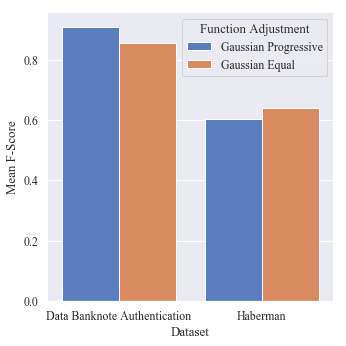

In [30]:
dataset_stats_banknote = helper.loadDatasetResults("Data Banknote Authentication", "Test", -1, False).sort_values(by=["Gausses"])
haberman = helper.loadDatasetResults("Haberman", "Test", -1, False).sort_values(by=["Gausses"])
dataset_stats_banknote = dataset_stats_banknote.loc[(dataset_stats_banknote.Gausses == 5) & (dataset_stats_banknote.Adjustment == "Center")]
haberman = haberman.loc[(haberman.Gausses == 9) & (haberman.Adjustment == "Center")]

df = pd.concat([dataset_stats_banknote, haberman])

display(df)
sns.set(style="darkgrid", font="Times New Roman", font_scale=1.08)
g = sns.catplot(x="Dataset", y="Mean F-Score", hue="Style", data=df, kind="bar", palette="muted", legend=False)
g.despine(left=True)
plt.legend(loc='upper right', title="Function Adjustment")
g.set_ylabels("Mean F-Score")
g.savefig("data_analysis_adj" + ".png")


df_print = df[["Dataset", "Gausses", "Style", "Accuracy", "F-Score A", "F-Score B", "Mean F-Score"]].reset_index(drop=True)
display(df_print)
print(df_print.to_latex(float_format=lambda x: '%10.3f' % x, index=False))

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,...,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
33,Gauss Functions Style,Data Banknote Authentication,Gaussian Progressive,11,Mean,Test,Value S-Functions,0.995146,0.994536,0.995633,...,0.994536,0.995633,183,229,0.5,5,---,34.970285,2019-05-25 14:00:53.442442,0.995084
35,Gauss Functions Style,Data Banknote Authentication,Gaussian Progressive,11,Center,Test,Value S-Functions,0.944175,0.965116,0.929167,...,0.935211,0.950959,183,229,0.5,5,---,18.785245,2019-05-25 14:14:56.371605,0.943085
29,Gauss Functions Style,Haberman,Gaussian Equal,9,Mean,Test,Value S-Functions,0.673913,0.312500,0.750000,...,0.250000,0.791667,24,68,0.5,5,---,2.907000,2019-05-25 12:32:40.898933,0.520833
31,Gauss Functions Style,Haberman,Gaussian Equal,9,Center,Test,Value S-Functions,0.750000,0.529412,0.800000,...,0.439024,0.839161,24,68,0.5,5,---,1.811999,2019-05-25 12:34:39.368716,0.639093


,Dataset,Gausses,Style,Adjustment,Accuracy,F-Score A,F-Score B,Mean F-Score
0,Data Banknote Authentication,11,Gaussian Progressive,Mean,0.995146,0.994536,0.995633,0.995084
1,Data Banknote Authentication,11,Gaussian Progressive,Center,0.944175,0.935211,0.950959,0.943085
2,Haberman,9,Gaussian Equal,Mean,0.673913,0.250000,0.791667,0.520833
3,Haberman,9,Gaussian Equal,Center,0.750000,0.439024,0.839161,0.639093


\begin{tabular}{lrllrrrr}
\toprule
                      Dataset &  Gausses &                 Style & Adjustment &   Accuracy &  F-Score A &  F-Score B &  Mean F-Score \\
\midrule
 Data Banknote Authentication &       11 &  Gaussian Progressive &       Mean &      0.995 &      0.995 &      0.996 &         0.995 \\
 Data Banknote Authentication &       11 &  Gaussian Progressive &     Center &      0.944 &      0.935 &      0.951 &         0.943 \\
                     Haberman &        9 &        Gaussian Equal &       Mean &      0.674 &      0.250 &      0.792 &         0.521 \\
                     Haberman &        9 &        Gaussian Equal &     Center &      0.750 &      0.439 &      0.839 &         0.639 \\
\bottomrule
\end{tabular}



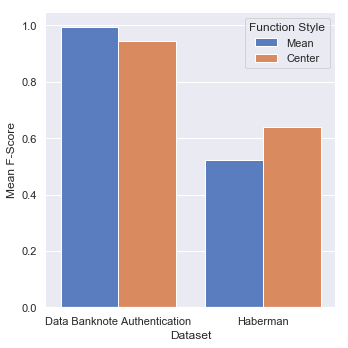

In [32]:
dataset_stats_banknote = helper.loadDatasetResults("Data Banknote Authentication", "Test", -1, False).sort_values(by=["Gausses"])
haberman = helper.loadDatasetResults("Haberman", "Test", -1, False).sort_values(by=["Gausses"])
dataset_stats_banknote = dataset_stats_banknote.loc[(dataset_stats_banknote.Gausses == 11) & (dataset_stats_banknote.Style == "Gaussian Progressive") & (dataset_stats_banknote.Adjustment != "Optymalized")]
haberman = haberman.loc[(haberman.Gausses == 9) & (haberman.Style == "Gaussian Equal") & (haberman.Adjustment != "Optymalized")]

df = pd.concat([dataset_stats_banknote, haberman])
display(df)
sns.set(style="darkgrid")
g = sns.catplot(x="Dataset", y="Mean F-Score", hue="Adjustment", data=df, kind="bar", palette="muted", legend=False)
g.despine(left=True)
plt.legend(loc='upper right', title="Function Style")
g.set_ylabels("Mean F-Score")
g.savefig("data_analysis_style" + ".png")

df_print = df[["Dataset", "Gausses", "Style", "Adjustment", "Accuracy", "F-Score A", "F-Score B", "Mean F-Score"]].reset_index(drop=True)
display(df_print)
print(df_print.to_latex(float_format=lambda x: '%10.3f' % x, index=False))

In [ ]:
# helper.loadBestResults()

In [5]:
fuzzifier = pickle.load(open("C:/Users/Adam/Documents/Studia/Magisterka/Projekt/Test - Datasets/Summaries/Fuzzification Statistics - Before Tests.p", "rb"))
fuzzifier.set_value(30, "% changed s.", 0.01)
fuzzifier

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Adam/Documents/Studia/Magisterka/Projekt/Test - Datasets/Summaries/Fuzzification Statistics - Before Tests.p'

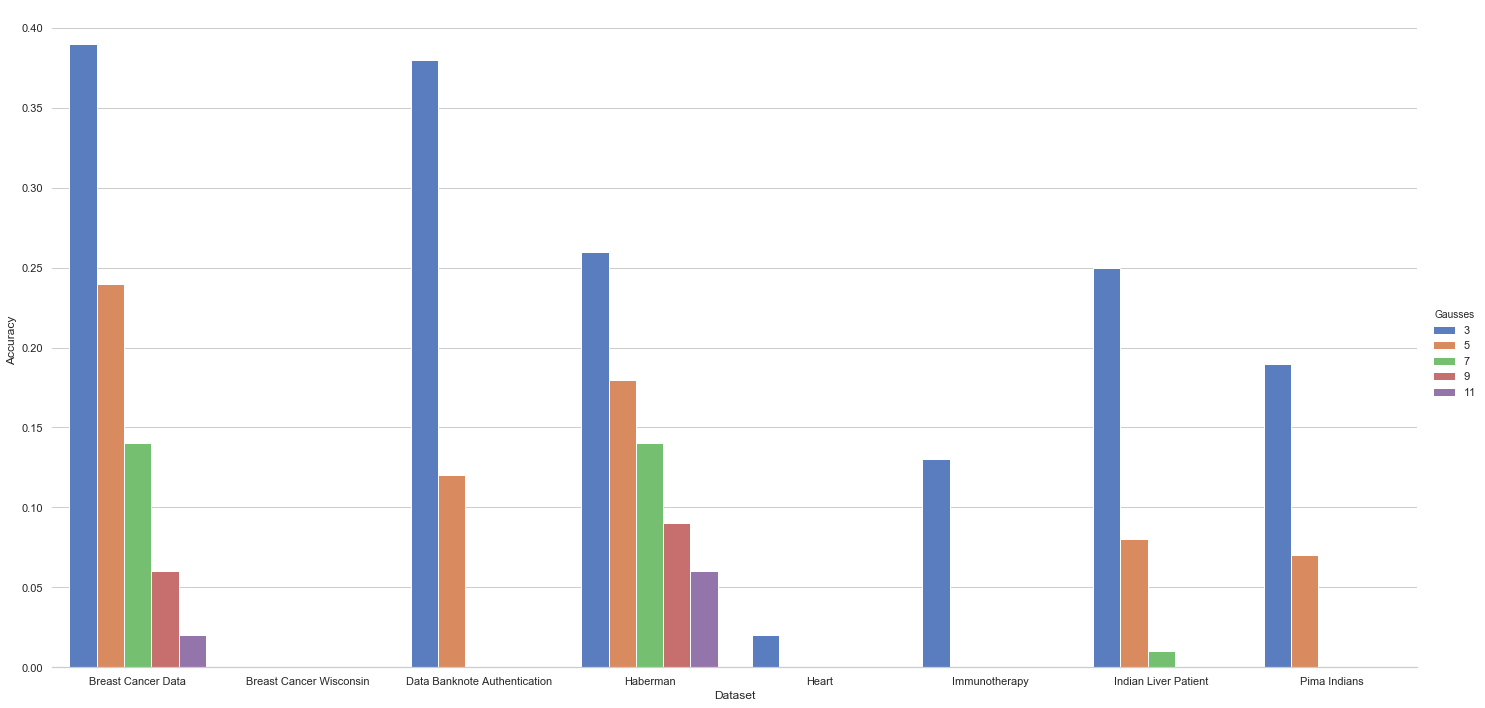

In [142]:
# fuzzifier = fuzzifier.groupby(["Gausses", "Dataset"], as_index=False).max()
# display(gausses_result)
# !pip install -U seaborn



sns.set(style="whitegrid")
g = sns.catplot(x="Dataset", y="% changed s.", hue="Gausses", data=fuzzifier, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


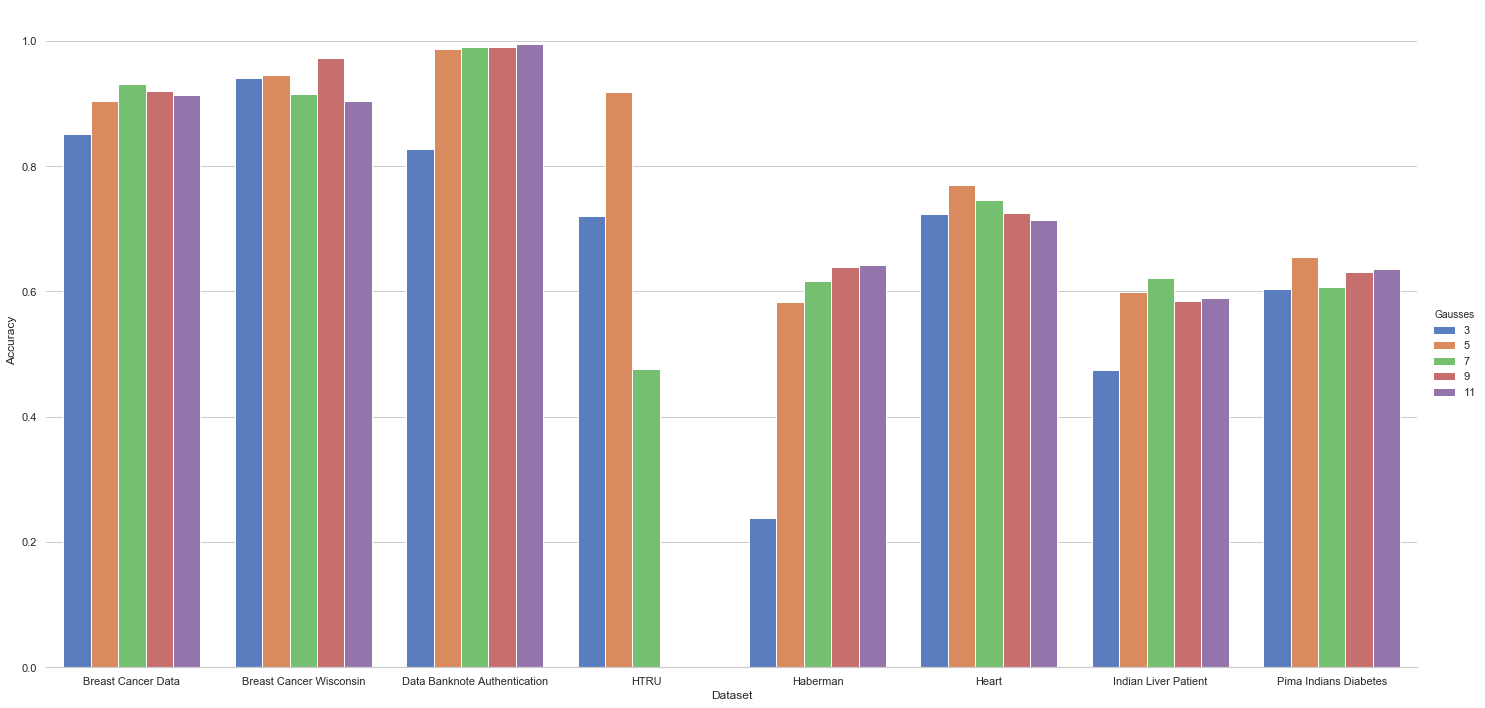

In [18]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results["Data Type"] == "Test")].groupby(["Gausses", "Dataset"], as_index=False).max()
# display(gausses_result)
# !pip install -U seaborn

sns.set(style="whitegrid")
g = sns.catplot(x="Dataset", y="Mean F-Score", hue="Gausses", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


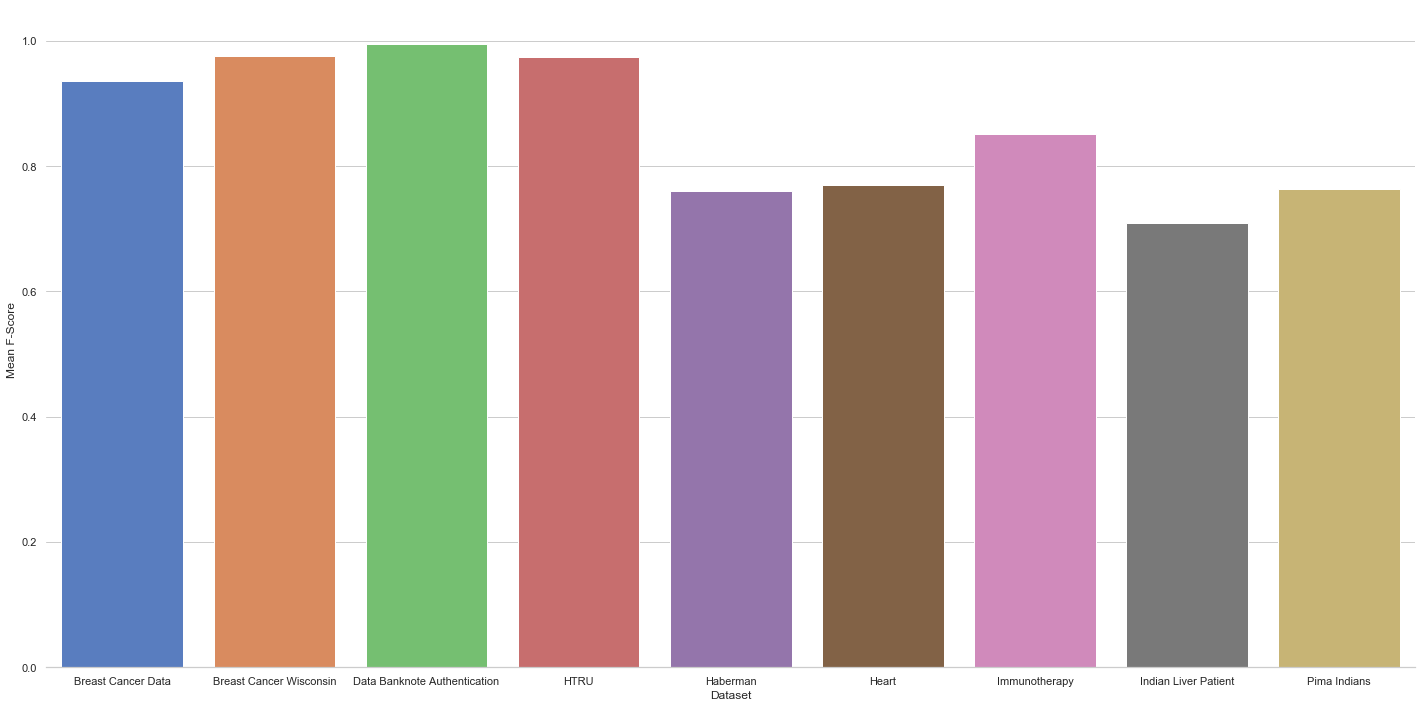

In [161]:
general_result = results.loc[(results["Data Type"] == "Test")].groupby(["Dataset"], as_index=False).max()
general_result["Another SVM"] = [0, 99.54, 98.90, 97.2, 75.16, 75.9, 83.0, 0, 80.21]
sns.set(style="whitegrid")
g = sns.catplot(x="Dataset", y="Accuracy", data=general_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Mean F-Score")

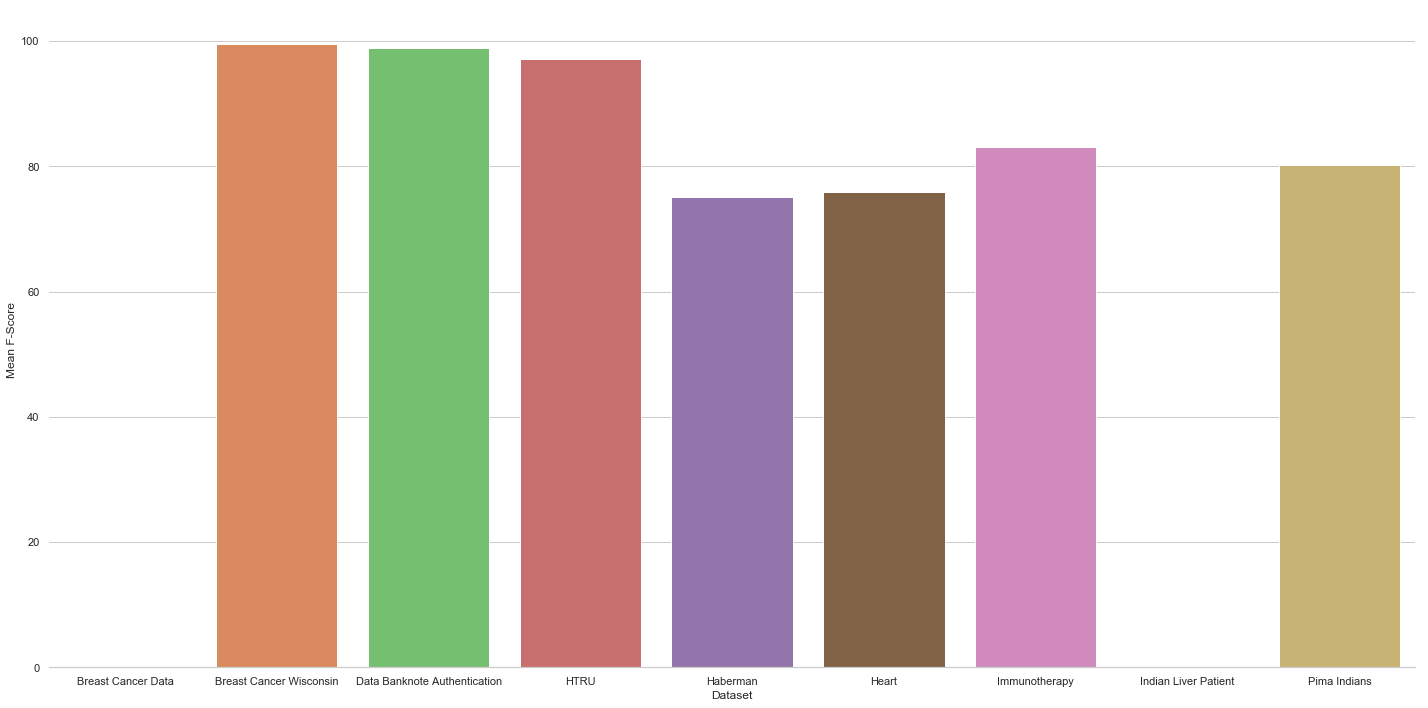

In [160]:
g = sns.catplot(x="Dataset", y="Another SVM", data=general_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Mean F-Score")




In [155]:
general_result

,Dataset,Test type,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,...,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score,Another SVM
0,Breast Cancer Data,Gauss Functions Style,Gaussian Progressive,11,Optymalized,Test,Value Threshold,0.935673,0.983871,0.977273,...,0.913386,107,64,0.751250,5,0.8010735796332016,14.413076,2019-05-27 15:51:17.917186,0.931112,0.00
1,Breast Cancer Wisconsin,Gauss Functions Style,Gaussian Progressive,11,Optymalized,Test,Value Threshold,0.975610,0.991525,1.000000,...,0.964539,133,72,0.500000,5,0.46260120191110304,101.945157,2019-05-27 22:26:58.019594,0.972976,99.54
2,Data Banknote Authentication,Gauss Functions Style,Gaussian Progressive,11,Optymalized,Test,Value Threshold,0.995146,1.000000,1.000000,...,0.995633,183,229,0.525000,5,0.5190441448679325,34.970285,2019-05-27 19:41:02.466677,0.995084,98.90
3,HTRU,Gauss Functions Style,Gaussian Progressive,7,Optymalized,Test,Value Threshold,0.974302,0.988462,0.980910,...,0.985947,492,4878,0.500000,5,0.4193196913119205,620.745531,2019-05-28 02:08:15.312451,0.918773,97.20
4,Haberman,Gauss Functions Style,Gaussian Progressive,11,Optymalized,Test,Value Threshold,0.760870,1.000000,1.000000,...,0.855346,24,68,0.641875,5,0.47414958775501476,5.483539,2019-05-27 14:52:30.881008,0.642802,75.16
5,Heart,Gauss Functions Style,Gaussian Progressive,11,Optymalized,Test,Value Threshold,0.769231,0.956522,0.800000,...,0.769231,50,41,0.500000,5,0.4906348594935503,103.217035,2019-05-27 13:08:41.093215,0.769231,75.90
6,Immunotherapy,Gauss Functions Style,Gaussian Progressive,11,Optymalized,Test,Value Threshold,0.851852,0.904762,1.000000,...,0.666667,21,6,0.500000,5,0.48064794167743363,3.882667,2019-05-27 14:19:29.151917,0.785714,83.00
7,Indian Liver Patient,Gauss Functions Style,Gaussian Progressive,11,Optymalized,Test,Value Threshold,0.708571,0.789916,0.476190,...,0.471698,125,50,0.583500,5,0.49794328564547347,177.287399,2019-05-27 21:06:10.263502,0.621095,0.00
8,Pima Indians,Gauss Functions Style,Gaussian Progressive,11,Optymalized,Test,Value Threshold,0.762712,0.920000,0.739130,...,0.666667,79,39,0.500000,5,0.4931289142740447,67.814913,2019-05-27 20:33:05.069677,0.712895,80.21


In [38]:
stats_df = helper.loadFuzzificationStats()

,Dataset,Style,Gausses,Adjustment,Samples,Train s.,Test s.,Changed s.,% changed s.,Implicants,Features,F. after reduct
0,Blood,Gaussian Progressive,3,Optymalized,748 (570/178),493 (376/117),255 (194/61),485,0.98,8,4,3
1,Blood,Gaussian Progressive,3,Mean,748 (570/178),493 (376/117),255 (194/61),475,0.96,18,4,3
2,Blood,Gaussian Equal,3,Mean,748 (570/178),493 (376/117),255 (194/61),475,0.96,18,4,3
3,Blood,Gaussian Progressive,5,Mean,748 (570/178),493 (376/117),255 (194/61),438,0.89,55,4,3
4,Blood,Gaussian Equal,5,Mean,748 (570/178),493 (376/117),255 (194/61),401,0.81,92,4,3
5,Blood,Gaussian Progressive,5,Optymalized,748 (570/178),493 (376/117),255 (194/61),479,0.97,14,4,3
6,Blood,Gaussian Equal,5,Optymalized,748 (570/178),493 (376/117),255 (194/61),468,0.95,25,4,3
7,Blood,Gaussian Progressive,7,Mean,748 (570/178),493 (376/117),255 (194/61),397,0.81,96,4,3
8,Blood,Gaussian Equal,7,Mean,748 (570/178),493 (376/117),255 (194/61),353,0.72,140,4,3
9,Blood,Gaussian Progressive,7,Optymalized,748 (570/178),493 (376/117),255 (194/61),462,0.94,31,4,3


In [39]:
stats_df.loc[stats_df.Dataset == "Haberman"]

,Dataset,Style,Gausses,Adjustment,Samples,Train s.,Test s.,Changed s.,% changed s.,Implicants,Features,F. after reduct
89,Haberman,Gaussian Progressive,3,Mean,306 (81/225),214 (57/157),92 (24/68),196,0.92,18,3,3
90,Haberman,Gaussian Progressive,3,Center,306 (81/225),214 (57/157),92 (24/68),197,0.92,17,3,3
91,Haberman,Gaussian Equal,3,Mean,306 (81/225),214 (57/157),92 (24/68),196,0.92,18,3,3
92,Haberman,Gaussian Equal,3,Center,306 (81/225),214 (57/157),92 (24/68),197,0.92,17,3,3
93,Haberman,Gaussian Progressive,5,Mean,306 (81/225),214 (57/157),92 (24/68),149,0.70,65,3,3
94,Haberman,Gaussian Progressive,5,Center,306 (81/225),214 (57/157),92 (24/68),176,0.82,38,3,3
95,Haberman,Gaussian Equal,5,Mean,306 (81/225),214 (57/157),92 (24/68),141,0.66,73,3,3
96,Haberman,Gaussian Equal,5,Center,306 (81/225),214 (57/157),92 (24/68),163,0.76,51,3,3
97,Haberman,Gaussian Progressive,7,Mean,306 (81/225),214 (57/157),92 (24/68),115,0.54,99,3,3
98,Haberman,Gaussian Progressive,7,Center,306 (81/225),214 (57/157),92 (24/68),158,0.74,56,3,3


In [6]:
stats_df.loc[stats_df.Dataset == "Data Banknote Authentication"]

,Dataset,Style,Gausses,Adjustment,Samples,Train s.,Test s.,Changed s.,% changed s.,Implicants,Features,F. after reduct
59,Data Banknote Authentication,Gaussian Progressive,3,Mean,1372 (610/762),960 (427/533),412 (183/229),925,0.96,35,4,4
60,Data Banknote Authentication,Gaussian Progressive,3,Center,1372 (610/762),960 (427/533),412 (183/229),931,0.97,29,4,4
61,Data Banknote Authentication,Gaussian Equal,3,Mean,1372 (610/762),960 (427/533),412 (183/229),925,0.96,35,4,4
62,Data Banknote Authentication,Gaussian Equal,3,Center,1372 (610/762),960 (427/533),412 (183/229),931,0.97,29,4,4
63,Data Banknote Authentication,Gaussian Progressive,5,Mean,1372 (610/762),960 (427/533),412 (183/229),792,0.82,168,4,4
64,Data Banknote Authentication,Gaussian Progressive,5,Center,1372 (610/762),960 (427/533),412 (183/229),854,0.89,106,4,4
65,Data Banknote Authentication,Gaussian Equal,5,Mean,1372 (610/762),960 (427/533),412 (183/229),885,0.92,75,4,4
66,Data Banknote Authentication,Gaussian Equal,5,Center,1372 (610/762),960 (427/533),412 (183/229),886,0.92,74,4,4
67,Data Banknote Authentication,Gaussian Progressive,7,Mean,1372 (610/762),960 (427/533),412 (183/229),727,0.76,233,4,4
68,Data Banknote Authentication,Gaussian Progressive,7,Center,1372 (610/762),960 (427/533),412 (183/229),784,0.82,176,4,4


In [ ]:
dataset_stats_breast = helper.loadDatasetResults("Breast Cancer Data")
dataset_stats_breast["Mean F-Score"] = (dataset_stats_breast["F-Score A"] + dataset_stats_breast["F-Score B"]) / 2
res_c = dataset_stats_breast.loc[(dataset_stats_breast["Data Type"] == "Test") & (dataset_stats_breast["Adjustment"] == "Center")].sort_values(by=["Gausses", "Mean F-Score"])
res_m = dataset_stats_breast.loc[(dataset_stats_breast["Data Type"] == "Test") & (dataset_stats_breast["Adjustment"] == "Mean")].sort_values(by=["Gausses", "Mean F-Score"])
display(dataset_stats_breast.loc[dataset_stats_breast["Data Type"] == "Test"].sort_values(by=["Gausses", "Mean F-Score"]))
display(dataset_stats_breast.loc[dataset_stats_breast["Data Type"] == "Train"].sort_values(by=["Gausses", "Mean F-Score"]))

In [ ]:
# res_c = dataset_stats_immunotherapy.loc[(dataset_stats_immunotherapy["Data Type"] == "Test") & (dataset_stats_immunotherapy["Adjustment"] == "Center")].sort_values(by=["Gausses", "Mean F-Score"])
# res_m = dataset_stats_immunotherapy.loc[(dataset_stats_immunotherapy["Data Type"] == "Test") & (dataset_stats_immunotherapy["Adjustment"] == "Mean")].sort_values(by=["Gausses", "Mean F-Score"])

# sns.set(style="whitegrid")
# g = sns.catplot(x="Style", y="Mean F-Score", col="Gausses", data=res_c, kind="bar", palette="muted", height=10, aspect=0.5)
# g.despine(left=True)
# g.set_ylabels("Accuracy")

In [ ]:
# res_c = dataset_stats_immunotherapy.loc[(dataset_stats_immunotherapy["Data Type"] == "Test") & (dataset_stats_immunotherapy["Adjustment"] == "Center")].sort_values(by=["Gausses", "Mean F-Score"])
# res_m = dataset_stats_immunotherapy.loc[(dataset_stats_immunotherapy["Data Type"] == "Test") & (dataset_stats_immunotherapy["Adjustment"] == "Mean")].sort_values(by=["Gausses", "Mean F-Score"])

# sns.set(style="whitegrid")
# g = sns.catplot(x="Style", y="Mean F-Score", col="Gausses", data=res_m, kind="bar", palette="muted", height=10, aspect=0.5)
# g.despine(left=True)
# g.set_ylabels("Accuracy")

In [2]:
dataset_stats_breast = helper.loadDatasetResults("Vertebral", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
79,Gauss Functions Style,Vertebral,Gaussian Equal,11,Optymalized,Test,Value S-Functions,0.867925,0.881579,0.833333,0.930556,0.735294,0.905405,0.78125,72,34,0.5,5,---,3.94107,2019-05-29 16:28:51.904363,0.843328
31,Gauss Functions Style,Vertebral,Gaussian Equal,9,Optymalized,Test,Value S-Functions,0.849462,0.865672,0.807692,0.920635,0.7,0.892308,0.75,63,30,0.5,5,---,2.73065,2019-05-29 14:29:28.501420,0.821154
39,Gauss Functions Style,Vertebral,Gaussian Equal,11,Optymalized,Test,Value S-Functions,0.849462,0.855072,0.833333,0.936508,0.666667,0.893939,0.740741,63,30,0.5,5,---,4.0626,2019-05-29 14:38:03.399057,0.81734
128,Gauss Functions Style,Vertebral,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.830189,0.909091,0.7,0.833333,0.823529,0.869565,0.756757,72,34,0.488563,5,0.4962318452192001,3.45856,2019-05-29 18:50:36.345486,0.813161
1108,Gauss Functions Style,Vertebral,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.820755,0.907692,0.682927,0.819444,0.823529,0.861314,0.746667,72,34,0.488563,5,0.4962318452192001,3.61206,2019-05-30 13:16:39.487883,0.80399
569,Gauss Functions Style,Vertebral,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.820755,0.907692,0.682927,0.819444,0.823529,0.861314,0.746667,72,34,0.488563,5,0.4962318452192001,4.24101,2019-05-30 05:21:08.774447,0.80399
667,Gauss Functions Style,Vertebral,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.820755,0.907692,0.682927,0.819444,0.823529,0.861314,0.746667,72,34,0.488563,5,0.4962318452192001,3.91701,2019-05-30 06:53:04.563602,0.80399
373,Gauss Functions Style,Vertebral,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.820755,0.907692,0.682927,0.819444,0.823529,0.861314,0.746667,72,34,0.488563,5,0.4962318452192001,4.98811,2019-05-30 02:17:55.889530,0.80399
106,Gauss Functions Style,Vertebral,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.820755,0.907692,0.682927,0.819444,0.823529,0.861314,0.746667,72,34,0.444375,5,0.49670060455085707,3.58956,2019-05-29 18:36:10.679383,0.80399
716,Gauss Functions Style,Vertebral,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.820755,0.907692,0.682927,0.819444,0.823529,0.861314,0.746667,72,34,0.488563,5,0.4962318452192001,3.76001,2019-05-30 07:37:27.581142,0.80399


In [3]:
dataset_stats_breast = helper.loadDatasetResults("Parkinson", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
19,Gauss Functions Style,Parkinson,Gaussian Progressive,7,Optymalized,Test,Value S-Functions,0.932203,0.916667,1,1,0.733333,0.956522,0.846154,44,15,0.5,5,---,5.67015,2019-05-29 14:24:28.382162,0.901338
1,Gauss Functions Style,Parkinson,Gaussian Progressive,3,Mean,Test,Value S-Functions,0.898305,0.952381,0.764706,0.909091,0.866667,0.930233,0.8125,44,15,0.5,5,---,5.6686,2019-05-29 14:12:46.016177,0.871366
5,Gauss Functions Style,Parkinson,Gaussian Equal,3,Mean,Test,Value S-Functions,0.898305,0.952381,0.764706,0.909091,0.866667,0.930233,0.8125,44,15,0.5,5,---,5.67263,2019-05-29 14:14:47.256792,0.871366
31,Gauss Functions Style,Parkinson,Gaussian Equal,9,Optymalized,Test,Value S-Functions,0.898305,0.931818,0.8,0.931818,0.8,0.931818,0.8,44,15,0.5,5,---,4.14711,2019-05-29 14:33:21.061044,0.865909
7,Gauss Functions Style,Parkinson,Gaussian Equal,3,Optymalized,Test,Value S-Functions,0.898305,0.931818,0.8,0.931818,0.8,0.931818,0.8,44,15,0.5,5,---,3.74521,2019-05-29 14:15:43.535385,0.865909
3,Gauss Functions Style,Parkinson,Gaussian Progressive,3,Optymalized,Test,Value S-Functions,0.898305,0.931818,0.8,0.931818,0.8,0.931818,0.8,44,15,0.5,5,---,3.87807,2019-05-29 14:13:41.858227,0.865909
73,Gauss Functions Style,Parkinson,Gaussian Progressive,11,Mean,Test,Value S-Functions,0.895522,0.958333,0.736842,0.901961,0.875,0.929293,0.8,51,16,0.5,5,---,2.47104,2019-05-29 16:27:41.949918,0.864646
67,Gauss Functions Style,Parkinson,Gaussian Progressive,9,Optymalized,Test,Value S-Functions,0.910448,0.909091,0.916667,0.980392,0.6875,0.943396,0.785714,51,16,0.5,5,---,3.22506,2019-05-29 16:23:12.306704,0.864555
59,Gauss Functions Style,Parkinson,Gaussian Progressive,7,Optymalized,Test,Value S-Functions,0.910448,0.909091,0.916667,0.980392,0.6875,0.943396,0.785714,51,16,0.5,5,---,5.91414,2019-05-29 16:17:05.250727,0.864555
57,Gauss Functions Style,Parkinson,Gaussian Progressive,7,Mean,Test,Value S-Functions,0.895522,0.94,0.764706,0.921569,0.8125,0.930693,0.787879,51,16,0.5,5,---,4.75608,2019-05-29 16:15:32.672836,0.859286


In [4]:
dataset_stats_breast = helper.loadDatasetResults("Ionosphere", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
10,Gauss Functions Style,Ionosphere,Gaussian Progressive,3,Mean,Test,Value S-Functions,0.95,0.930233,0.961039,0.930233,0.961039,0.930233,0.961039,43,77,0.5,5,---,200.947,2019-05-29 16:17:07.902772,0.945636
14,Gauss Functions Style,Ionosphere,Gaussian Equal,3,Mean,Test,Value S-Functions,0.95,0.930233,0.961039,0.930233,0.961039,0.930233,0.961039,43,77,0.5,5,---,194.061,2019-05-29 16:38:39.144230,0.945636
378,Gauss Functions Style,Ionosphere,Gaussian Progressive,3,Optymalized,Test,Value S-Functions,0.925,0.904762,0.935897,0.883721,0.948052,0.894118,0.941935,43,77,0.499922,5,---,161.563,2019-05-31 07:04:21.174576,0.918027
356,Gauss Functions Style,Ionosphere,Gaussian Progressive,3,Optymalized,Test,Value S-Functions,0.925,0.904762,0.935897,0.883721,0.948052,0.894118,0.941935,43,77,0.499609,5,---,164.803,2019-05-31 05:22:54.201620,0.918027
5,Gauss Functions Style,Ionosphere,Gaussian Equal,3,Mean,Test,Value S-Functions,0.924528,0.894737,0.941176,0.894737,0.941176,0.894737,0.941176,38,68,0.5,5,---,181.924,2019-05-29 14:47:20.143072,0.917957
405,Gauss Functions Style,Ionosphere,Gaussian Equal,3,Mean,Test,Value S-Functions,0.925,0.925,0.925,0.860465,0.961039,0.891566,0.942675,43,77,0.5,5,---,149.155,2019-05-31 13:31:04.942737,0.917121
307,Gauss Functions Style,Ionosphere,Gaussian Progressive,3,Mean,Test,Value S-Functions,0.916667,0.923077,0.91358,0.837209,0.961039,0.878049,0.936709,43,77,0.5,5,---,168.464,2019-05-30 21:53:13.059607,0.907379
12,Gauss Functions Style,Ionosphere,Gaussian Progressive,3,Optymalized,Test,Value S-Functions,0.916667,0.923077,0.91358,0.837209,0.961039,0.878049,0.936709,43,77,0.5,5,---,177.132,2019-05-29 16:27:25.388124,0.907379
16,Gauss Functions Style,Ionosphere,Gaussian Equal,3,Optymalized,Test,Value S-Functions,0.916667,0.923077,0.91358,0.837209,0.961039,0.878049,0.936709,43,77,0.5,5,---,171.813,2019-05-29 16:48:33.534469,0.907379
1,Gauss Functions Style,Ionosphere,Gaussian Progressive,3,Mean,Test,Value S-Functions,0.915094,0.891892,0.927536,0.868421,0.941176,0.88,0.934307,38,68,0.5,5,---,181.2,2019-05-29 14:23:09.951567,0.907153


In [5]:
dataset_stats_breast = helper.loadDatasetResults("Breast Cancer Data", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
17,Gauss Functions Style,Breast Cancer Data,Gaussian Progressive,7,Mean,Test,Value S-Functions,0.935673,0.944444,0.920635,0.953271,0.90625,0.948837,0.913386,107,64,0.5,5,---,11.5109,2019-05-25 12:20:02.103978,0.931112
29,Gauss Functions Style,Breast Cancer Data,Gaussian Equal,9,Mean,Test,Value S-Functions,0.923977,0.943396,0.892308,0.934579,0.90625,0.938967,0.899225,107,64,0.5,5,---,9.89055,2019-05-25 13:07:03.399531,0.919096
37,Gauss Functions Style,Breast Cancer Data,Gaussian Equal,11,Mean,Test,Value S-Functions,0.918129,0.942857,0.878788,0.925234,0.90625,0.933962,0.892308,107,64,0.5,5,---,14.4131,2019-05-25 14:11:04.955296,0.913135
33,Gauss Functions Style,Breast Cancer Data,Gaussian Progressive,11,Mean,Test,Value S-Functions,0.918129,0.926606,0.903226,0.943925,0.875,0.935185,0.888889,107,64,0.5,5,---,14.3189,2019-05-25 13:52:09.272680,0.912037
95,Gauss Functions Style,Breast Cancer Data,Gaussian Equal,5,Optymalized,Test,Value Threshold,0.912281,0.903509,0.929825,0.962617,0.828125,0.932127,0.876033,107,64,0.75125,5,0.8010735796332016,2.545,2019-05-27 09:52:23.951644,0.90408
73,Gauss Functions Style,Breast Cancer Data,Gaussian Equal,5,Optymalized,Test,Value Threshold,0.912281,0.903509,0.929825,0.962617,0.828125,0.932127,0.876033,107,64,0.735,5,0.8001743120565761,2.624,2019-05-27 09:35:01.827025,0.90408
25,Gauss Functions Style,Breast Cancer Data,Gaussian Progressive,9,Mean,Test,Value S-Functions,0.906433,0.90991,0.9,0.943925,0.84375,0.926606,0.870968,107,64,0.5,5,---,13.1824,2019-05-25 12:51:24.415497,0.898787
21,Gauss Functions Style,Breast Cancer Data,Gaussian Equal,7,Mean,Test,Value S-Functions,0.900585,0.96875,0.813333,0.869159,0.953125,0.916256,0.877698,107,64,0.5,5,---,6.599,2019-05-25 12:31:26.459829,0.896977
9,Gauss Functions Style,Breast Cancer Data,Gaussian Progressive,5,Mean,Test,Value S-Functions,0.900585,0.95,0.830986,0.88785,0.921875,0.917874,0.874074,107,64,0.5,5,---,6.90452,2019-05-25 11:53:40.490004,0.895974
52,Gauss Functions Style,Breast Cancer Data,Gaussian Equal,5,Optymalized,Test,Value S-Functions,0.894737,0.92381,0.848485,0.906542,0.875,0.915094,0.861538,107,64,0.735,5,---,3.208,2019-05-27 09:13:58.264191,0.888316


In [6]:
dataset_stats_wisconsin = helper.loadDatasetResults("Breast Cancer Wisconsin", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
94,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Equal,9,Optymalized,Test,Value S-Functions,0.97561,0.970588,0.985507,0.992481,0.944444,0.981413,0.964539,133,72,0.498437,5,---,61.918,2019-05-27 19:30:51.042675,0.972976
45,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Equal,5,Optymalized,Test,Value S-Functions,0.95122,0.942446,0.969697,0.984962,0.888889,0.963235,0.927536,133,72,0.5,5,---,27.065,2019-05-27 10:50:24.477643,0.945386
3,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Progressive,3,Center,Test,Value S-Functions,0.946341,0.948529,0.942029,0.969925,0.902778,0.959108,0.921986,133,72,0.5,5,---,18.806,2019-05-25 11:36:43.741858,0.940547
7,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Equal,3,Center,Test,Value S-Functions,0.946341,0.948529,0.942029,0.969925,0.902778,0.959108,0.921986,133,72,0.5,5,---,16.5953,2019-05-25 11:43:08.621907,0.940547
15,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Equal,5,Center,Test,Value S-Functions,0.946341,0.935714,0.969231,0.984962,0.875,0.959707,0.919708,133,72,0.5,5,---,51.2988,2019-05-25 12:35:11.240942,0.939707
29,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Equal,9,Mean,Test,Value S-Functions,0.926829,0.915493,0.952381,0.977444,0.833333,0.945455,0.888889,133,72,0.5,5,---,97.997,2019-05-25 14:29:04.963361,0.917172
27,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Progressive,9,Center,Test,Value S-Functions,0.926829,0.909722,0.967213,0.984962,0.819444,0.945848,0.887218,133,72,0.5,5,---,76.4484,2019-05-25 14:10:16.155841,0.916533
19,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Progressive,7,Center,Test,Value S-Functions,0.926829,0.90411,0.983051,0.992481,0.805556,0.946237,0.885496,133,72,0.5,5,---,61.1918,2019-05-25 13:11:26.310232,0.915866
9,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Progressive,5,Mean,Test,Value S-Functions,0.926829,0.90411,0.983051,0.992481,0.805556,0.946237,0.885496,133,72,0.5,5,---,58.9705,2019-05-25 12:00:08.213637,0.915866
66,Gauss Functions Style,Breast Cancer Wisconsin,Gaussian Equal,5,Optymalized,Test,Value Threshold,0.917073,0.991525,0.816092,0.879699,0.986111,0.932271,0.893082,133,72,0.5,5,0.46217451502293955,22.34,2019-05-27 11:48:12.121927,0.912676


In [8]:
dataset_stats_haberman = helper.loadDatasetResults("Haberman", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
33,Gauss Functions Style,Haberman,Gaussian Progressive,11,Mean,Test,Value S-Functions,0.728261,0.478261,0.811594,0.458333,0.823529,0.468085,0.817518,24,68,0.5,5,---,3.11913,2019-05-25 12:42:16.755945,0.642802
31,Gauss Functions Style,Haberman,Gaussian Equal,9,Center,Test,Value S-Functions,0.75,0.529412,0.8,0.375,0.882353,0.439024,0.839161,24,68,0.5,5,---,1.812,2019-05-25 12:34:39.368716,0.639093
137,Gauss Functions Style,Haberman,Gaussian Equal,9,Optymalized,Test,Value S-Functions,0.75,0.529412,0.8,0.375,0.882353,0.439024,0.839161,24,68,0.51375,5,---,1.88,2019-05-27 14:31:35.470455,0.639093
158,Gauss Functions Style,Haberman,Gaussian Equal,9,Optymalized,Test,Value Threshold,0.76087,0.583333,0.7875,0.291667,0.926471,0.388889,0.851351,24,68,0.51375,5,0.47376965451435826,1.89,2019-05-27 14:52:30.881008,0.62012
21,Gauss Functions Style,Haberman,Gaussian Equal,7,Mean,Test,Value S-Functions,0.73913,0.5,0.789474,0.333333,0.882353,0.4,0.833333,24,68,0.5,5,---,2.35517,2019-05-25 12:19:28.156830,0.616667
25,Gauss Functions Style,Haberman,Gaussian Progressive,9,Mean,Test,Value S-Functions,0.76087,0.6,0.780488,0.25,0.941176,0.352941,0.853333,24,68,0.5,5,---,3.023,2019-05-25 12:25:57.609988,0.603137
27,Gauss Functions Style,Haberman,Gaussian Progressive,9,Center,Test,Value S-Functions,0.76087,0.6,0.780488,0.25,0.941176,0.352941,0.853333,24,68,0.5,5,---,1.9222,2019-05-25 12:28:23.442624,0.603137
136,Gauss Functions Style,Haberman,Gaussian Equal,9,Optymalized,Test,Value Threshold,0.75,0.545455,0.777778,0.25,0.926471,0.342857,0.845638,24,68,0.4,5,0.47414958775501476,1.992,2019-05-27 14:31:32.632461,0.594247
39,Gauss Functions Style,Haberman,Gaussian Equal,11,Center,Test,Value S-Functions,0.695652,0.409091,0.785714,0.375,0.808824,0.391304,0.797101,24,68,0.5,5,---,2.75854,2019-05-25 12:53:54.504560,0.594203
37,Gauss Functions Style,Haberman,Gaussian Equal,11,Mean,Test,Value S-Functions,0.706522,0.421053,0.780822,0.333333,0.838235,0.372093,0.808511,24,68,0.5,5,---,5.48354,2019-05-25 12:50:32.887596,0.590302


In [9]:
dataset_stats_heart = helper.loadDatasetResults("Heart", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
45,Gauss Functions Style,Heart,Gaussian Equal,5,Mean,Test,Value S-Functions,0.769231,0.853659,0.7,0.7,0.853659,0.769231,0.769231,50,41,0.5,5,---,77.5288,2019-05-25 15:26:08.248817,0.769231
23,Gauss Functions Style,Heart,Gaussian Equal,7,Center,Test,Value S-Functions,0.747253,0.909091,0.655172,0.6,0.926829,0.722892,0.767677,50,41,0.5,5,---,71.6304,2019-05-25 13:31:50.041368,0.745284
53,Gauss Functions Style,Heart,Gaussian Equal,5,Optymalized,Test,Value S-Functions,0.747253,0.721311,0.8,0.88,0.585366,0.792793,0.676056,50,41,0.499219,5,---,21.971,2019-05-27 11:28:04.185645,0.734425
47,Gauss Functions Style,Heart,Gaussian Equal,5,Center,Test,Value S-Functions,0.736264,0.933333,0.639344,0.56,0.95122,0.7,0.764706,50,41,0.5,5,---,66.3733,2019-05-25 15:34:06.122084,0.732353
25,Gauss Functions Style,Heart,Gaussian Progressive,9,Mean,Test,Value S-Functions,0.725275,0.804878,0.66,0.66,0.804878,0.725275,0.725275,50,41,0.5,5,---,54.5532,2019-05-25 13:50:55.753990,0.725275
1,Gauss Functions Style,Heart,Gaussian Progressive,3,Mean,Test,Value S-Functions,0.725275,0.755102,0.690476,0.74,0.707317,0.747475,0.698795,50,41,0.5,5,---,61.0418,2019-05-25 11:38:35.618697,0.723135
5,Gauss Functions Style,Heart,Gaussian Equal,3,Mean,Test,Value S-Functions,0.725275,0.755102,0.690476,0.74,0.707317,0.747475,0.698795,50,41,0.5,5,---,95.7684,2019-05-25 11:52:54.039662,0.723135
9,Gauss Functions Style,Heart,Gaussian Progressive,3,Mean,Test,Value S-Functions,0.725275,0.755102,0.690476,0.74,0.707317,0.747475,0.698795,50,41,0.5,5,---,103.217,2019-05-25 12:19:17.438659,0.723135
13,Gauss Functions Style,Heart,Gaussian Equal,3,Mean,Test,Value S-Functions,0.725275,0.755102,0.690476,0.74,0.707317,0.747475,0.698795,50,41,0.5,5,---,93.6764,2019-05-25 12:42:45.836219,0.723135
37,Gauss Functions Style,Heart,Gaussian Equal,11,Mean,Test,Value S-Functions,0.714286,0.772727,0.659574,0.68,0.756098,0.723404,0.704545,50,41,0.5,5,---,28.2129,2019-05-25 14:48:22.570706,0.713975


In [10]:
dataset_stats_htru = helper.loadDatasetResults("HTRU", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
45,Gauss Functions Style,HTRU,Gaussian Equal,5,Optymalized,Test,Value S-Functions,0.974302,0.90411,0.980535,0.804878,0.99139,0.851613,0.985933,492,4878,0.4125,5,---,177.93,2019-05-28 02:08:15.312451,0.918773
44,Gauss Functions Style,HTRU,Gaussian Equal,5,Optymalized,Test,Value Threshold,0.974302,0.913551,0.979563,0.794715,0.992415,0.85,0.985947,492,4878,0.4075,5,0.4193196913119205,178.041,2019-05-28 02:04:30.513704,0.917974
23,Gauss Functions Style,HTRU,Gaussian Equal,5,Optymalized,Test,Value S-Functions,0.973557,0.892377,0.98091,0.808943,0.99016,0.848614,0.985513,492,4878,0.4075,5,---,211.54,2019-05-27 19:46:57.268681,0.917064
11,Gauss Functions Style,HTRU,Gaussian Progressive,5,Center,Test,Value S-Functions,0.959404,0.947712,0.960111,0.589431,0.99672,0.726817,0.978073,492,4878,0.5,5,---,196.208,2019-05-25 16:29:58.616572,0.852445
15,Gauss Functions Style,HTRU,Gaussian Equal,5,Center,Test,Value S-Functions,0.95568,0.988462,0.954012,0.522358,0.999385,0.683511,0.976171,492,4878,0.5,5,---,249.157,2019-05-25 18:11:04.536771,0.829841
13,Gauss Functions Style,HTRU,Gaussian Equal,5,Mean,Test,Value S-Functions,0.947672,0.934156,0.948313,0.461382,0.99672,0.617687,0.971914,492,4878,0.5,5,---,620.746,2019-05-25 17:44:10.279232,0.794801
3,Gauss Functions Style,HTRU,Gaussian Progressive,3,Center,Test,Value S-Functions,0.936499,0.987097,0.934995,0.310976,0.99959,0.472952,0.966214,492,4878,0.5,5,---,74.5649,2019-05-25 11:47:54.176680,0.719583
7,Gauss Functions Style,HTRU,Gaussian Equal,3,Center,Test,Value S-Functions,0.936499,0.987097,0.934995,0.310976,0.99959,0.472952,0.966214,492,4878,0.5,5,---,155.286,2019-05-25 12:15:15.055649,0.719583
1,Gauss Functions Style,HTRU,Gaussian Progressive,3,Mean,Test,Value S-Functions,0.910056,0.666667,0.911286,0.0365854,0.998155,0.0693642,0.952744,492,4878,0.5,5,---,129.251,2019-05-25 11:41:52.916163,0.511054
5,Gauss Functions Style,HTRU,Gaussian Equal,3,Mean,Test,Value S-Functions,0.910056,0.666667,0.911286,0.0365854,0.998155,0.0693642,0.952744,492,4878,0.5,5,---,142.887,2019-05-25 12:05:21.501781,0.511054


In [16]:
dataset_stats_immunotherapy = helper.loadDatasetResults("Immunotherapy", "Test", -1, True)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 630, saw 21


In [17]:
dataset_stats_liver = helper.loadDatasetResults("Indian Liver Patient", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
21,Gauss Functions Style,Indian Liver Patient,Gaussian Equal,7,Mean,Test,Value S-Functions,0.68,0.789916,0.446429,0.752,0.5,0.770492,0.471698,125,50,0.5,5,---,112.333,2019-05-25 13:48:10.720239,0.621095
9,Gauss Functions Style,Indian Liver Patient,Gaussian Progressive,5,Mean,Test,Value S-Functions,0.662857,0.775,0.418182,0.744,0.46,0.759184,0.438095,125,50,0.5,5,---,47.8685,2019-05-25 12:09:04.392,0.598639
35,Gauss Functions Style,Indian Liver Patient,Gaussian Progressive,11,Center,Test,Value S-Functions,0.668571,0.76378,0.416667,0.776,0.4,0.769841,0.408163,125,50,0.5,5,---,12.9701,2019-05-25 16:06:26.414800,0.589002
17,Gauss Functions Style,Indian Liver Patient,Gaussian Progressive,7,Mean,Test,Value S-Functions,0.651429,0.766667,0.4,0.736,0.44,0.75102,0.419048,125,50,0.5,5,---,79.9177,2019-05-25 13:21:25.090204,0.585034
25,Gauss Functions Style,Indian Liver Patient,Gaussian Progressive,9,Mean,Test,Value S-Functions,0.64,0.77193,0.393443,0.704,0.48,0.736402,0.432432,125,50,0.5,5,---,125.962,2019-05-25 14:37:35.016467,0.584417
13,Gauss Functions Style,Indian Liver Patient,Gaussian Equal,5,Mean,Test,Value S-Functions,0.691429,0.751773,0.441176,0.848,0.3,0.796992,0.357143,125,50,0.5,5,---,89.6206,2019-05-25 12:47:15.255612,0.577068
39,Gauss Functions Style,Indian Liver Patient,Gaussian Equal,11,Center,Test,Value S-Functions,0.674286,0.753731,0.414634,0.808,0.34,0.779923,0.373626,125,50,0.5,5,---,34.4675,2019-05-25 16:27:25.181327,0.576775
31,Gauss Functions Style,Indian Liver Patient,Gaussian Equal,9,Center,Test,Value S-Functions,0.674286,0.746377,0.405405,0.824,0.3,0.78327,0.344828,125,50,0.5,5,---,30.6654,2019-05-25 15:29:49.923508,0.564049
138,Gauss Functions Style,Indian Liver Patient,Gaussian Equal,9,Optymalized,Test,Value Threshold,0.702857,0.744966,0.461538,0.888,0.24,0.810219,0.315789,125,50,0.493906,5,0.49794328564547347,19.8613,2019-05-27 21:06:10.263502,0.563004
116,Gauss Functions Style,Indian Liver Patient,Gaussian Equal,9,Optymalized,Test,Value Threshold,0.702857,0.744966,0.461538,0.888,0.24,0.810219,0.315789,125,50,0.485937,5,0.4979415164634367,20.294,2019-05-27 19:43:56.839677,0.563004


In [13]:
dataset_stats_pima = helper.loadDatasetResults("Pima Indians Diabetes", "Test", -1, True)

,Test type,Dataset,Style,Gausses,Adjustment,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date,Mean F-Score
9,Gauss Functions Style,Pima Indians Diabetes,Gaussian Progressive,5,Mean,Test,Value S-Functions,0.705628,0.741176,0.606557,0.84,0.45679,0.7875,0.521127,150,81,0.5,5,---,14.0328,2019-05-29 15:35:27.865950,0.654313
15,Gauss Functions Style,Pima Indians Diabetes,Gaussian Equal,5,Optymalized,Test,Value S-Functions,0.714286,0.728261,0.659574,0.893333,0.382716,0.802395,0.484375,150,81,0.5,5,---,8.09186,2019-05-29 15:52:21.019242,0.643385
133,Gauss Functions Style,Pima Indians Diabetes,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.698473,0.73,0.596774,0.853801,0.406593,0.787062,0.48366,171,91,0.499219,5,0.5001293954499452,32.0499,2019-05-30 06:39:52.820415,0.635361
57,Gauss Functions Style,Pima Indians Diabetes,Gaussian Equal,11,Optymalized,Test,Value S-Functions,0.698473,0.73,0.596774,0.853801,0.406593,0.787062,0.48366,171,91,0.5,5,---,28.2101,2019-05-29 18:40:11.257956,0.635361
182,Gauss Functions Style,Pima Indians Diabetes,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.698473,0.73,0.596774,0.853801,0.406593,0.787062,0.48366,171,91,0.499219,5,0.5001293954499452,26.486,2019-05-30 11:15:41.294244,0.635361
231,Gauss Functions Style,Pima Indians Diabetes,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.698473,0.73,0.596774,0.853801,0.406593,0.787062,0.48366,171,91,0.499219,5,0.5001293954499452,24.8531,2019-05-30 15:43:06.053118,0.635361
280,Gauss Functions Style,Pima Indians Diabetes,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.698473,0.73,0.596774,0.853801,0.406593,0.787062,0.48366,171,91,0.499219,5,0.5001293954499452,25.4474,2019-05-30 20:09:50.305581,0.635361
329,Gauss Functions Style,Pima Indians Diabetes,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.698473,0.73,0.596774,0.853801,0.406593,0.787062,0.48366,171,91,0.499219,5,0.5001293954499452,25.428,2019-05-31 00:37:03.558890,0.635361
378,Gauss Functions Style,Pima Indians Diabetes,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.698473,0.73,0.596774,0.853801,0.406593,0.787062,0.48366,171,91,0.499219,5,0.5001293954499452,24.8331,2019-05-31 05:01:01.116483,0.635361
427,Gauss Functions Style,Pima Indians Diabetes,Gaussian Equal,11,Optymalized,Test,Value Threshold,0.698473,0.73,0.596774,0.853801,0.406593,0.787062,0.48366,171,91,0.499219,5,0.5001293954499452,25.1123,2019-05-31 09:24:08.511449,0.635361


In [14]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

best_results = results.groupby(["Dataset", "Gausses", "Style", "Adjustment"], as_index=False)["Mean F-Score"].max()
best_results["Style & Adjustment"] = best_results['Style'] + " | " + best_results['Adjustment']
best_results = best_results.drop(["Style", "Adjustment"], axis = 1)

# best_results["Dataset & Gausses"] = best_results['Dataset'] + " " + best_results['Gausses']
# best_results = best_results.drop(["Dataset", "Gausses"], axis = 1)
# best_results = best_results.drop(["Gausses"], axis = 1)
best_results = best_results.groupby(["Dataset", "Gausses", "Style & Adjustment"], as_index=False)["Mean F-Score"].max()

best_results.pivot_table(
        values='Mean F-Score', 
        index=['Dataset', 'Gausses'], 
        columns='Style & Adjustment', 
        aggfunc=np.max)


NameError: name 'dataset_stats_immunotherapy' is not defined

In [128]:
gauss_number = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gauss_number = gauss_number.groupby

Style & Adjustment                    Gaussian Equal | Center  \
Dataset                      Gausses                            
Breast Cancer Data           3                       0.319357   
                             5                       0.595013   
                             7                       0.725109   
                             9                       0.828057   
                             11                      0.845625   
Breast Cancer Wisconsin      3                       0.940547   
                             5                       0.939707   
                             7                       0.873966   
                             9                       0.897773   
                             11                      0.897773   
Data Banknote Authentication 3                       0.734471   
                             5                       0.856653   
                             7                       0.955298   
                             9                       0.980292   
                             11                      0.990179   
HTRU                         3                       0.719583   
                             5                       0.829841   
                             7                            NaN   
Haberman                     3                       0.206897   
                             5                       0.270192   
                             7                       0.553869   
                             9                       0.639093   
                             11                      0.594203   
Heart                        3                       0.702001   
                             5                       0.732353   
                             7                       0.745284   
                             9                       0.680702   
                             11                      0.658681   
Immunotherapy                3                       0.785714   
                             5                       0.400000   
                             7                       0.400000   
                             9                       0.631818   
                             11                      0.706522   
Indian Liver Patient         3                       0.434171   
                             5                       0.448316   
                             7                       0.501378   
                             9                       0.564049   
                             11                      0.576775   
Pima Indians                 3                       0.483014   
                             5                       0.628430   
                             7                       0.536723   
                             9                       0.641586   
                             11                      0.522267   

Style & Adjustment                    Gaussian Equal | Mean  \
Dataset                      Gausses                          
Breast Cancer Data           3                     0.851140   
                             5                     0.742470   
                             7                     0.896977   
                             9                     0.919096   
                             11                    0.913135   
Breast Cancer Wisconsin      3                     0.715114   
                             5                     0.910617   
                             7                     0.903859   
                             9                     0.917172   
                             11                    0.903859   
Data Banknote Authentication 3                     0.827023   
                             5                     0.872559   
                             7                     0.990169   
                             9                     0.990179   
                             11                    0.992631   
HTR

In [107]:
display(best_results.pivot(index="Dataset", columns="Style & Adjustment", values="Gausses"))

ValueError: Index contains duplicate entries, cannot reshape

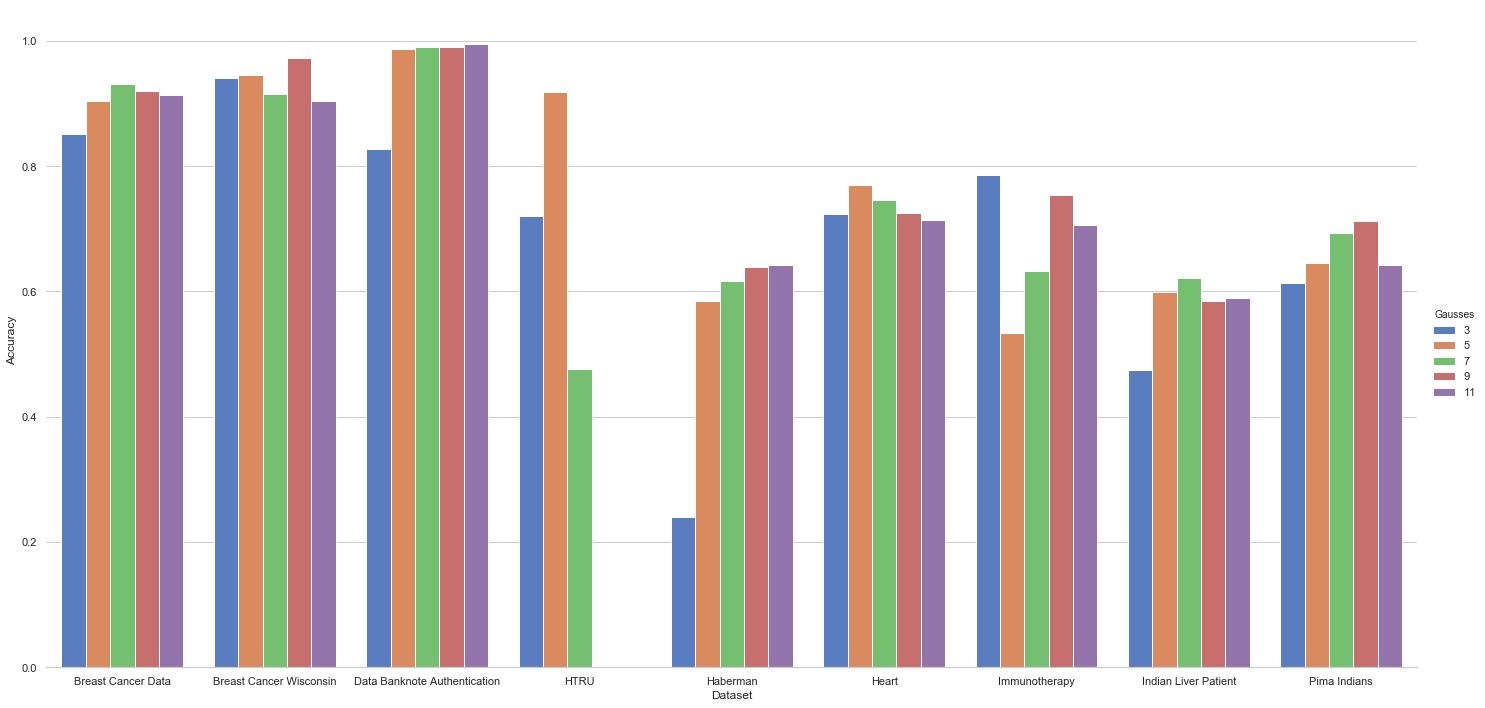

In [130]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results["Data Type"] == "Test")].groupby(["Gausses", "Dataset"], as_index=False).max()
# display(gausses_result)
# !pip install -U seaborn

sns.set(style="whitegrid")
g = sns.catplot(x="Dataset", y="Mean F-Score", hue="Gausses", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


In [ ]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results["Data Type"] == "Test")].groupby(["Gausses", "Dataset"], as_index=False).max()
# display(gausses_result)
# !pip install -U seaborn

sns.set(style="whitegrid")
g = sns.catplot(x="Dataset", y="Accuracy", hue="Gausses", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


In [ ]:
# stats_df["Samples Number"] = fuzzifier["Samples"].apply(lambda x: int(x.split("(")[0]))
# display(stats_df)
g = sns.catplot(x="Dataset", y="% changed s.", hue="Gausses", data=fuzzifier, kind="bar", palette="muted", height=10, aspect=2)
g.set_ylabels("% changed s.")
# g.set(yscale ='log')
g.despine(left=True)


In [ ]:
g = sns.catplot(x="Dataset", y="% changed s.", hue="Gausses", data=stats_df, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)


In [ ]:
stats_df["Samples Number"] = stats_df["Samples"].apply(lambda x: int(x.split("(")[0]))
display(stats_df)
g = sns.catplot(x="Dataset", y="Samples Number", data=stats_df, kind="bar", palette="muted", height=10, aspect=2)
g.set_ylabels("Samples Number")
g.set(yscale ='log')
g.despine(left=True)


In [ ]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Operation == "BruteForce Threshold")]
# !pip install -U seaborn

sns.set(style="whitegrid")
g = sns.catplot(x="Dataset", y="Accuracy", hue="Gausses", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


In [ ]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])
gausses_result = results.loc[(results["Operation"] == "Value Threshold") & (results["Data Type"] == "Test")]

# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
g = sns.catplot(x="Dataset", y="Accuracy", hue="Gausses", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


In [ ]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Operation == "BruteForce Threshold")]
gausses_result["F-Score Average"] = (gausses_result["F-Score A"] + gausses_result["F-Score B"])/2
# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ax = sns.barplot(x="Gausses", y="Accuracy", data=adam)
%matplotlib inline
sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(20,8))
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Dataset", y="Accuracy", hue="Gausses", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


In [ ]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Gausses == 5) & (results["Data Type"] == "Train")]
gausses_result["F-Score Average"] = (gausses_result["F-Score A"] + gausses_result["F-Score B"])/2
# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ax = sns.barplot(x="Gausses", y="Accuracy", data=adam)
%matplotlib inline
sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(20,8))
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Dataset", y="F-Score Average", hue="Operation", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


In [ ]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Gausses == 5) & (results["Data Type"] == "Test")]
gausses_result["F-Score Average"] = (gausses_result["F-Score A"] + gausses_result["F-Score B"])/2
# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ax = sns.barplot(x="Gausses", y="Accuracy", data=adam)
%matplotlib inline
sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(20,8))
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Dataset", y="F-Score Average", hue="Operation", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


In [ ]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Gausses == 5)]
gausses_result["F-Score Average"] = (gausses_result["F-Score A"] + gausses_result["F-Score B"])/2
# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ax = sns.barplot(x="Gausses", y="Accuracy", data=adam)
%matplotlib inline
sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(20,8))
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Dataset", y="Accuracy", hue="Operation", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


In [ ]:
datasets = ["Breast Cancer Data", "Breast Cancer Wisconsin", "Data Banknote Authentication", "Haberman", "Heart", "HTRU", "Immunotherapy", "Indian Liver Patient", "Pima Indians"]

for dataset in datasets:
    df = pickle.load(open("Pickle/" + dataset + "/3 Gausses/train_features_df.p", "rb"))
    print("Train:\t{}: {}".format(dataset, round(df.Decision.value_counts().max() / df.Decision.count(), 3)))
    
for dataset in datasets:
    df = pickle.load(open("Pickle/" + dataset + "/3 Gausses/test_features_df.p", "rb"))
    print("Test:\t{}: {}".format(dataset, round(df.Decision.value_counts().max() / df.Decision.count(), 3)))